In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
sns.set_style('darkgrid') 

GLOBAL_SEED = 42

In [6]:
# @title Installing SHAP
try:
  import shap
except:
  print("Installing SHAP")
  !pip install shap

In [7]:
datasets = ["./train/Cytoplasm_all_fea_ovr_dataset.csv",
            "./train/Nucleus_all_fea_ovr_dataset.csv",
            "./train/Endoplasmic_Reticulum_all_fea_ovr_dataset.csv",
            "./train/Extracellular_all_fea_ovr_dataset.csv",
            "./train/Mitochondria_all_fea_ovr_dataset.csv" 
          ]

Localization = ["Cytoplasm", "Nucleus", "Endoplasmic_Reticulum", "Extracellular", "Mitochondria"]

# datasets = ["./train/Endoplasmic_Reticulum_all_fea_ovr_dataset.csv",
#             "./train/Extracellular_all_fea_ovr_dataset.csv",
#             "./train/Mitochondria_all_fea_ovr_dataset.csv" 
#            ]

# Localization = ["Endoplasmic_Reticulum", "Extracellular","Mitochondria"]

Data set is Cytoplasm


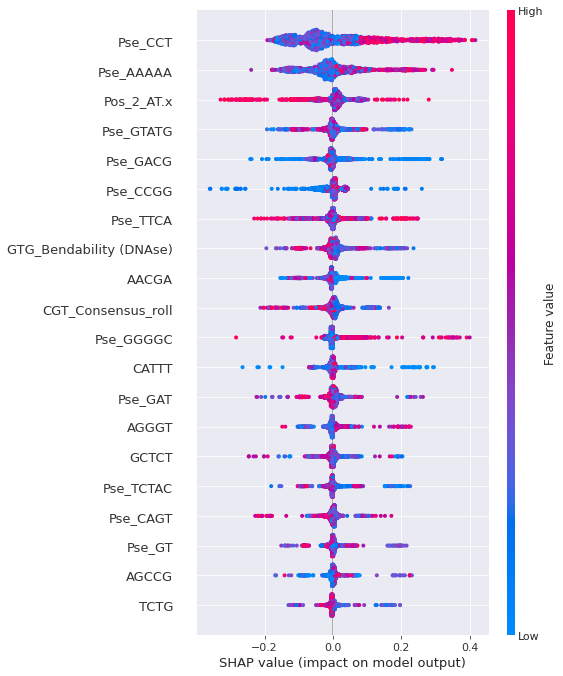

                     col_name  feature_importance_vals
1409                  Pse_CCT               206.673056
1706                Pse_AAAAA               116.444305
5960               Pos_2_AT.x                74.121072
2424                Pse_GTATG                48.023520
1584                 Pse_GACG                46.292760
1540                 Pse_CCGG                43.248298
1694                 Pse_TTCA                42.917792
5208  GTG_Bendability (DNAse)                41.368288
360                     AACGA                39.938774
5445       CGT_Consensus_roll                38.964102
2387                Pse_GGGGC                35.182722
655                     CATTT                28.860437
1421                  Pse_GAT                27.656036
507                     AGGGT                26.523641
967                     GCTCT                24.929051
2587                Pse_TCTAC                23.687380
1525                 Pse_CAGT                23.544006
1371      

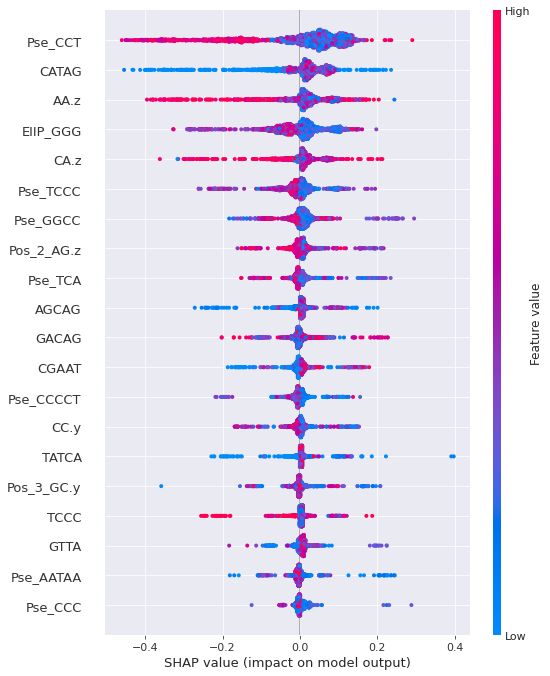

        col_name  feature_importance_vals
1409     Pse_CCT               187.077578
642        CATAG               103.888360
6076        AA.z                92.803388
2772    EIIP_GGG                87.853341
6088        CA.z                56.833876
1663    Pse_TCCC                50.697388
1615    Pse_GGCC                41.466302
5953  Pos_2_AG.z                33.834258
1438     Pse_TCA                30.258604
482        AGCAG                29.527333
866        GACAG                29.239678
723        CGAAT                26.264532
2049   Pse_CCCCT                25.990881
6090        CC.y                25.816443
1156       TATCA                21.579559
6018  Pos_3_GC.y                20.970483
293         TCCC                20.635664
268         GTTA                19.271744
1754   Pse_AATAA                19.069010
1407     Pse_CCC                17.802511

Data set is Endoplasmic_Reticulum


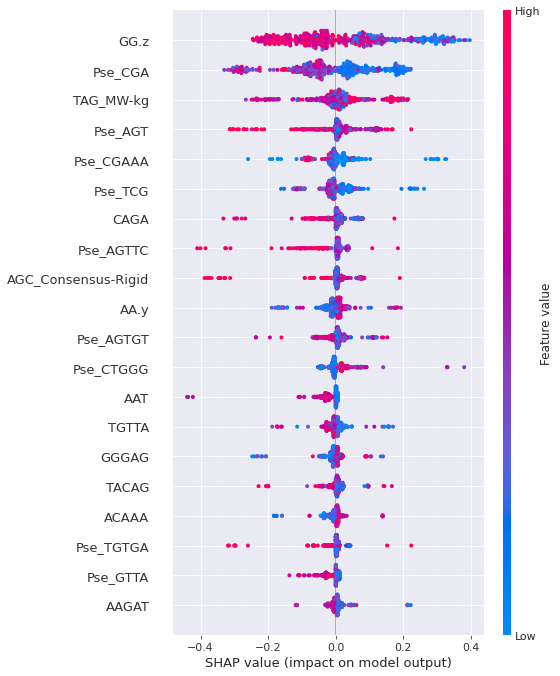

                 col_name  feature_importance_vals
6106                 GG.z                62.424883
1410              Pse_CGA                46.826436
5788            TAG_MW-kg                25.152063
1397              Pse_AGT                18.673658
2090            Pse_CGAAA                14.414912
1440              Pse_TCG                13.482978
152                  CAGA                11.115082
1895            Pse_AGTTC                10.804254
5491  AGC_Consensus-Rigid                10.618663
6075                 AA.y                10.461962
1893            Pse_AGTGT                 9.715807
2196            Pse_CTGGG                 9.417216
19                    AAT                 9.141160
1292                TGTTA                 7.662036
1010                GGGAG                 7.484691
1122                TACAG                 6.898512
400                 ACAAA                 6.744645
2658            Pse_TGTGA                 6.548677
1638             Pse_GTTA      

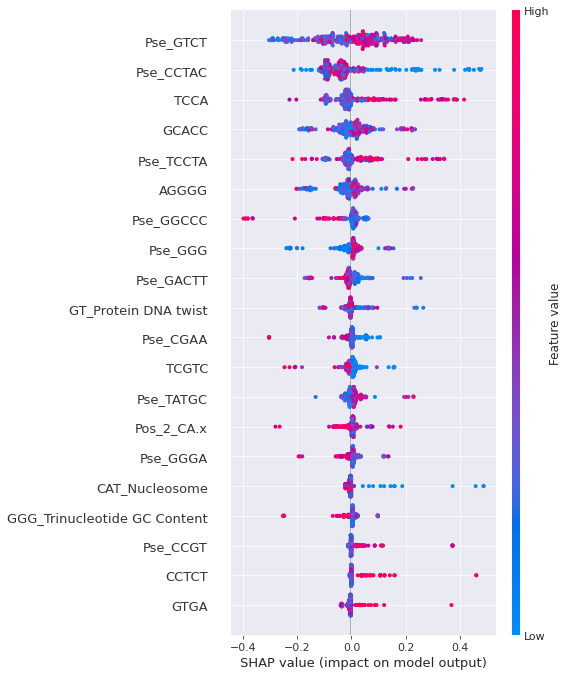

                          col_name  feature_importance_vals
1633                      Pse_GTCT                28.846373
2075                     Pse_CCTAC                24.563183
292                           TCCA                17.138336
917                          GCACC                13.030264
2566                     Pse_TCCTA                12.843472
506                          AGGGG                10.559118
2367                     Pse_GGCCC                 8.395368
1428                       Pse_GGG                 7.892994
2249                     Pse_GACTT                 7.254099
3061          GT_Protein DNA twist                 5.718517
1546                      Pse_CGAA                 5.530338
1213                         TCGTC                 5.309657
2531                     Pse_TATGC                 5.038264
5969                    Pos_2_CA.x                 5.019980
1618                      Pse_GGGA                 4.821176
5821                CAT_Nucleosome      

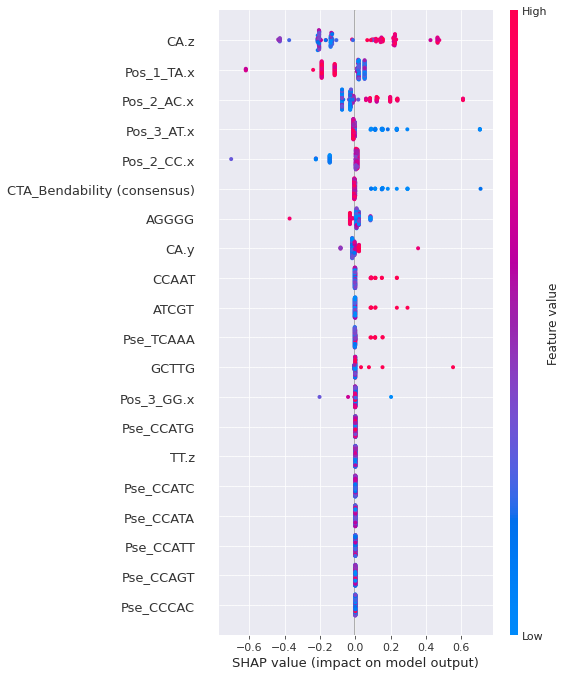

                         col_name  feature_importance_vals
6088                         CA.z                29.340910
6038                   Pos_1_TA.x                14.023380
5942                   Pos_2_AC.x                12.214785
5963                   Pos_3_AT.x                 7.009193
5978                   Pos_2_CC.x                 5.582243
5254  CTA_Bendability (consensus)                 3.881014
506                         AGGGG                 3.022339
6087                         CA.y                 2.275990
659                         CCAAT                 1.780037
555                         ATCGT                 1.251607
2538                    Pse_TCAAA                 1.048577
974                         GCTTG                 1.016545
6026                   Pos_3_GG.x                 0.564205
4100     GG_Minor Groove Distance                 0.000000
4105     TT_Minor Groove Distance                 0.000000
4104     TG_Minor Groove Distance                 0.0000

In [8]:
from sklearn.ensemble import RandomForestClassifier

loc=0
for ds in datasets:
    print("Data set is", Localization[loc])
    print("==============================================================")
    df = pd.read_csv(ds)
    df["label"]  = df["label"].replace({Localization[loc]:1, "AllRest":0})
    X = df.drop(["SampleName","label"], axis=1)
    y = df["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
    model = DecisionTreeClassifier(random_state=GLOBAL_SEED, min_samples_split=2)
    # train the model data - trining dataset
    model.fit(X_train, y_train)
    # Initialize JavaScript visualizations in notebook environment
    shap.initjs()
    # Define a tree explainer for the built model
    explainer = shap.TreeExplainer(model)
    # obtain shap values for the first row of the test data
    shap_values = explainer.shap_values(X_test.iloc[0])
    # obtain shap values for the test data
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values[1], X_test, plot_type='bar', max_display=20)
    shap.summary_plot(shap_values[1], X_test)
    feature_names = X_test.columns
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(feature_names, sum(vals))), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)
    print(feature_importance.head(20))
    print()
    print("==================================================")
    loc = loc+1


In [9]:
# # develop a decision tree model
# model = DecisionTreeClassifier(random_state=GLOBAL_SEED, max_depth=5)
# # train the model data - trining dataset
# model.fit(X_train, y_train)
# # Visualize how model classified the entire data
# tree_graph = export_graphviz(model, out_file=None, feature_names = X_train.columns, rounded=True, filled=True)
# graphviz.Source(tree_graph)